In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools
from glob import glob
import cv2
import sys
from PIL import Image
from IPython.display import Image

In [ ]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATADIR_Training = '/content/drive/MyDrive/Dataset(Train, Test, Valid)/DS/train'

In [ ]:
train_generator = train_datagen.flow_from_directory(
        DATADIR_Training,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Abnormal', 'History', 'Mi', 'Normal'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 548 images belonging to 4 classes.


In [ ]:
DATADIR_Testing = '/content/drive/MyDrive/Dataset(Train, Test, Valid)/DS/valid'

In [ ]:
valid_generator = train_datagen.flow_from_directory(
        DATADIR_Testing,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Abnormal', 'History', 'Mi', 'Normal'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 129 images belonging to 4 classes.


In [ ]:
test_dir = '/content/drive/MyDrive/Dataset(Train, Test, Valid)/DS/test' #eikane google colab er test link daw

In [ ]:
test_generator = train_datagen.flow_from_directory(
        test_dir,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Abnormal', 'History', 'Mi', 'Normal'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 20 images belonging to 4 classes.


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 30

History = model.fit(train_generator,
                        validation_data=valid_generator,
                        epochs=30,
                        steps_per_epoch=len(train_generator),
                        validation_steps=len(valid_generator))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
18/18 [==============================] - 50s 3s/step - loss: 1.9434 - acc: 0.2974 - val_loss: 1.3658 - val_acc: 0.2326
Epoch 2/30
18/18 [==============================] - 49s 3s/step - loss: 1.3198 - acc: 0.3887 - val_loss: 1.4897 - val_acc: 0.2326
Epoch 3/30
18/18 [==============================] - 50s 3s/step - loss: 1.2258 - acc: 0.4599 - val_loss: 0.9320 - val_acc: 0.5891
Epoch 4/30
18/18 [==============================] - 50s 3s/step - loss: 1.1702 - acc: 0.6004 - val_loss: 0.8706 - val_acc: 0.6434
Epoch 5/30
18/18 [==============================] - 49s 3s/step - loss: 0.8574 - acc: 0.6551 - val_loss: 0.8352 - val_acc: 0.6822
Epoch 6/30
18/18 [==============================] - 49s 3s/step - loss: 0.6970 - acc: 0.7573 - val_loss: 0.7439 - val_acc: 0.7054
Epoch 7/30
18/18 [==============================] - 50s 3s/step - loss: 0.5411 - acc: 0.8139 - val_loss: 0.6416 - val_acc: 0.7519
Epoch 8/30
18/18 [==============================] - 49s 3s/step - loss: 0.5622 - acc: 0.78

In [64]:
class_dict = test_generator.class_indices
print(class_dict)

{'Abnormal': 0, 'History': 1, 'Mi': 2, 'Normal': 3}


In [65]:
predictions = model.predict(x=test_generator, steps=len(test_generator), verbose=0)

In [66]:
test_labels = test_generator.classes

In [67]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 1 1 0]
 [0 5 0 0]
 [0 0 5 0]
 [0 0 0 5]]


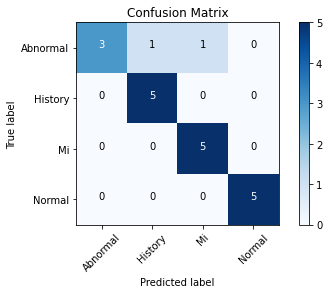

In [69]:
cm_plot_labels = ['Abnormal', 'History', 'Mi', 'Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [70]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200,200),
        batch_size=5,
        class_mode='categorical',
        shuffle=False)

class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


nb_validation_samples = 129
batch_size = 5
#Confution Matrix and Classification Report
Y_pred = model.predict(test_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

#print('Confusion Matrix')
#print(confusion_matrix(test_generator.classes, y_pred))
print("\n\n")
print('Classification Report\n')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 20 images belonging to 4 classes.



Classification Report

              precision    recall  f1-score   support

    Abnormal       1.00      0.60      0.75         5
     History       0.83      1.00      0.91         5
          Mi       0.83      1.00      0.91         5
      Normal       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.89        20
weighted avg       0.92      0.90      0.89        20



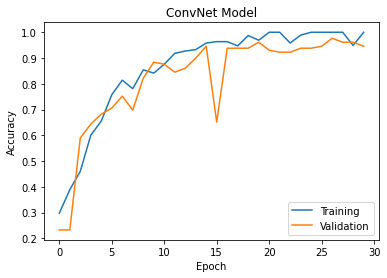

In [71]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('ConvNet Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

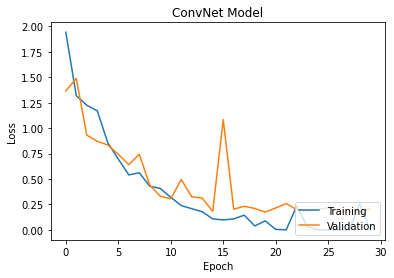

In [72]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('ConvNet Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

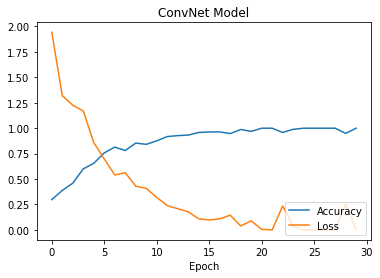

In [73]:
plt.plot(History.history['acc'])
plt.plot(History.history['loss'])
plt.title('ConvNet Model')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='lower right')
plt.show()

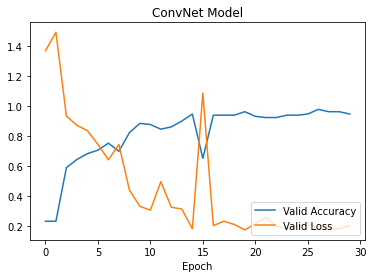

In [74]:
plt.plot(History.history['val_acc'])
plt.plot(History.history['val_loss'])
plt.title('ConvNet Model')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(['Valid Accuracy', 'Valid Loss'], loc='lower right')
plt.show()

In [75]:
model.save('ECGConvNet.model')

INFO:tensorflow:Assets written to: ECGConvNet.model/assets


In [78]:
def prepare_image(file):
    img_path = '/content/drive/MyDrive/Dataset(Train, Test, Valid)/DS/Apply/'
    img = image.load_img(img_path + file, target_size=(200, 200, 3))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

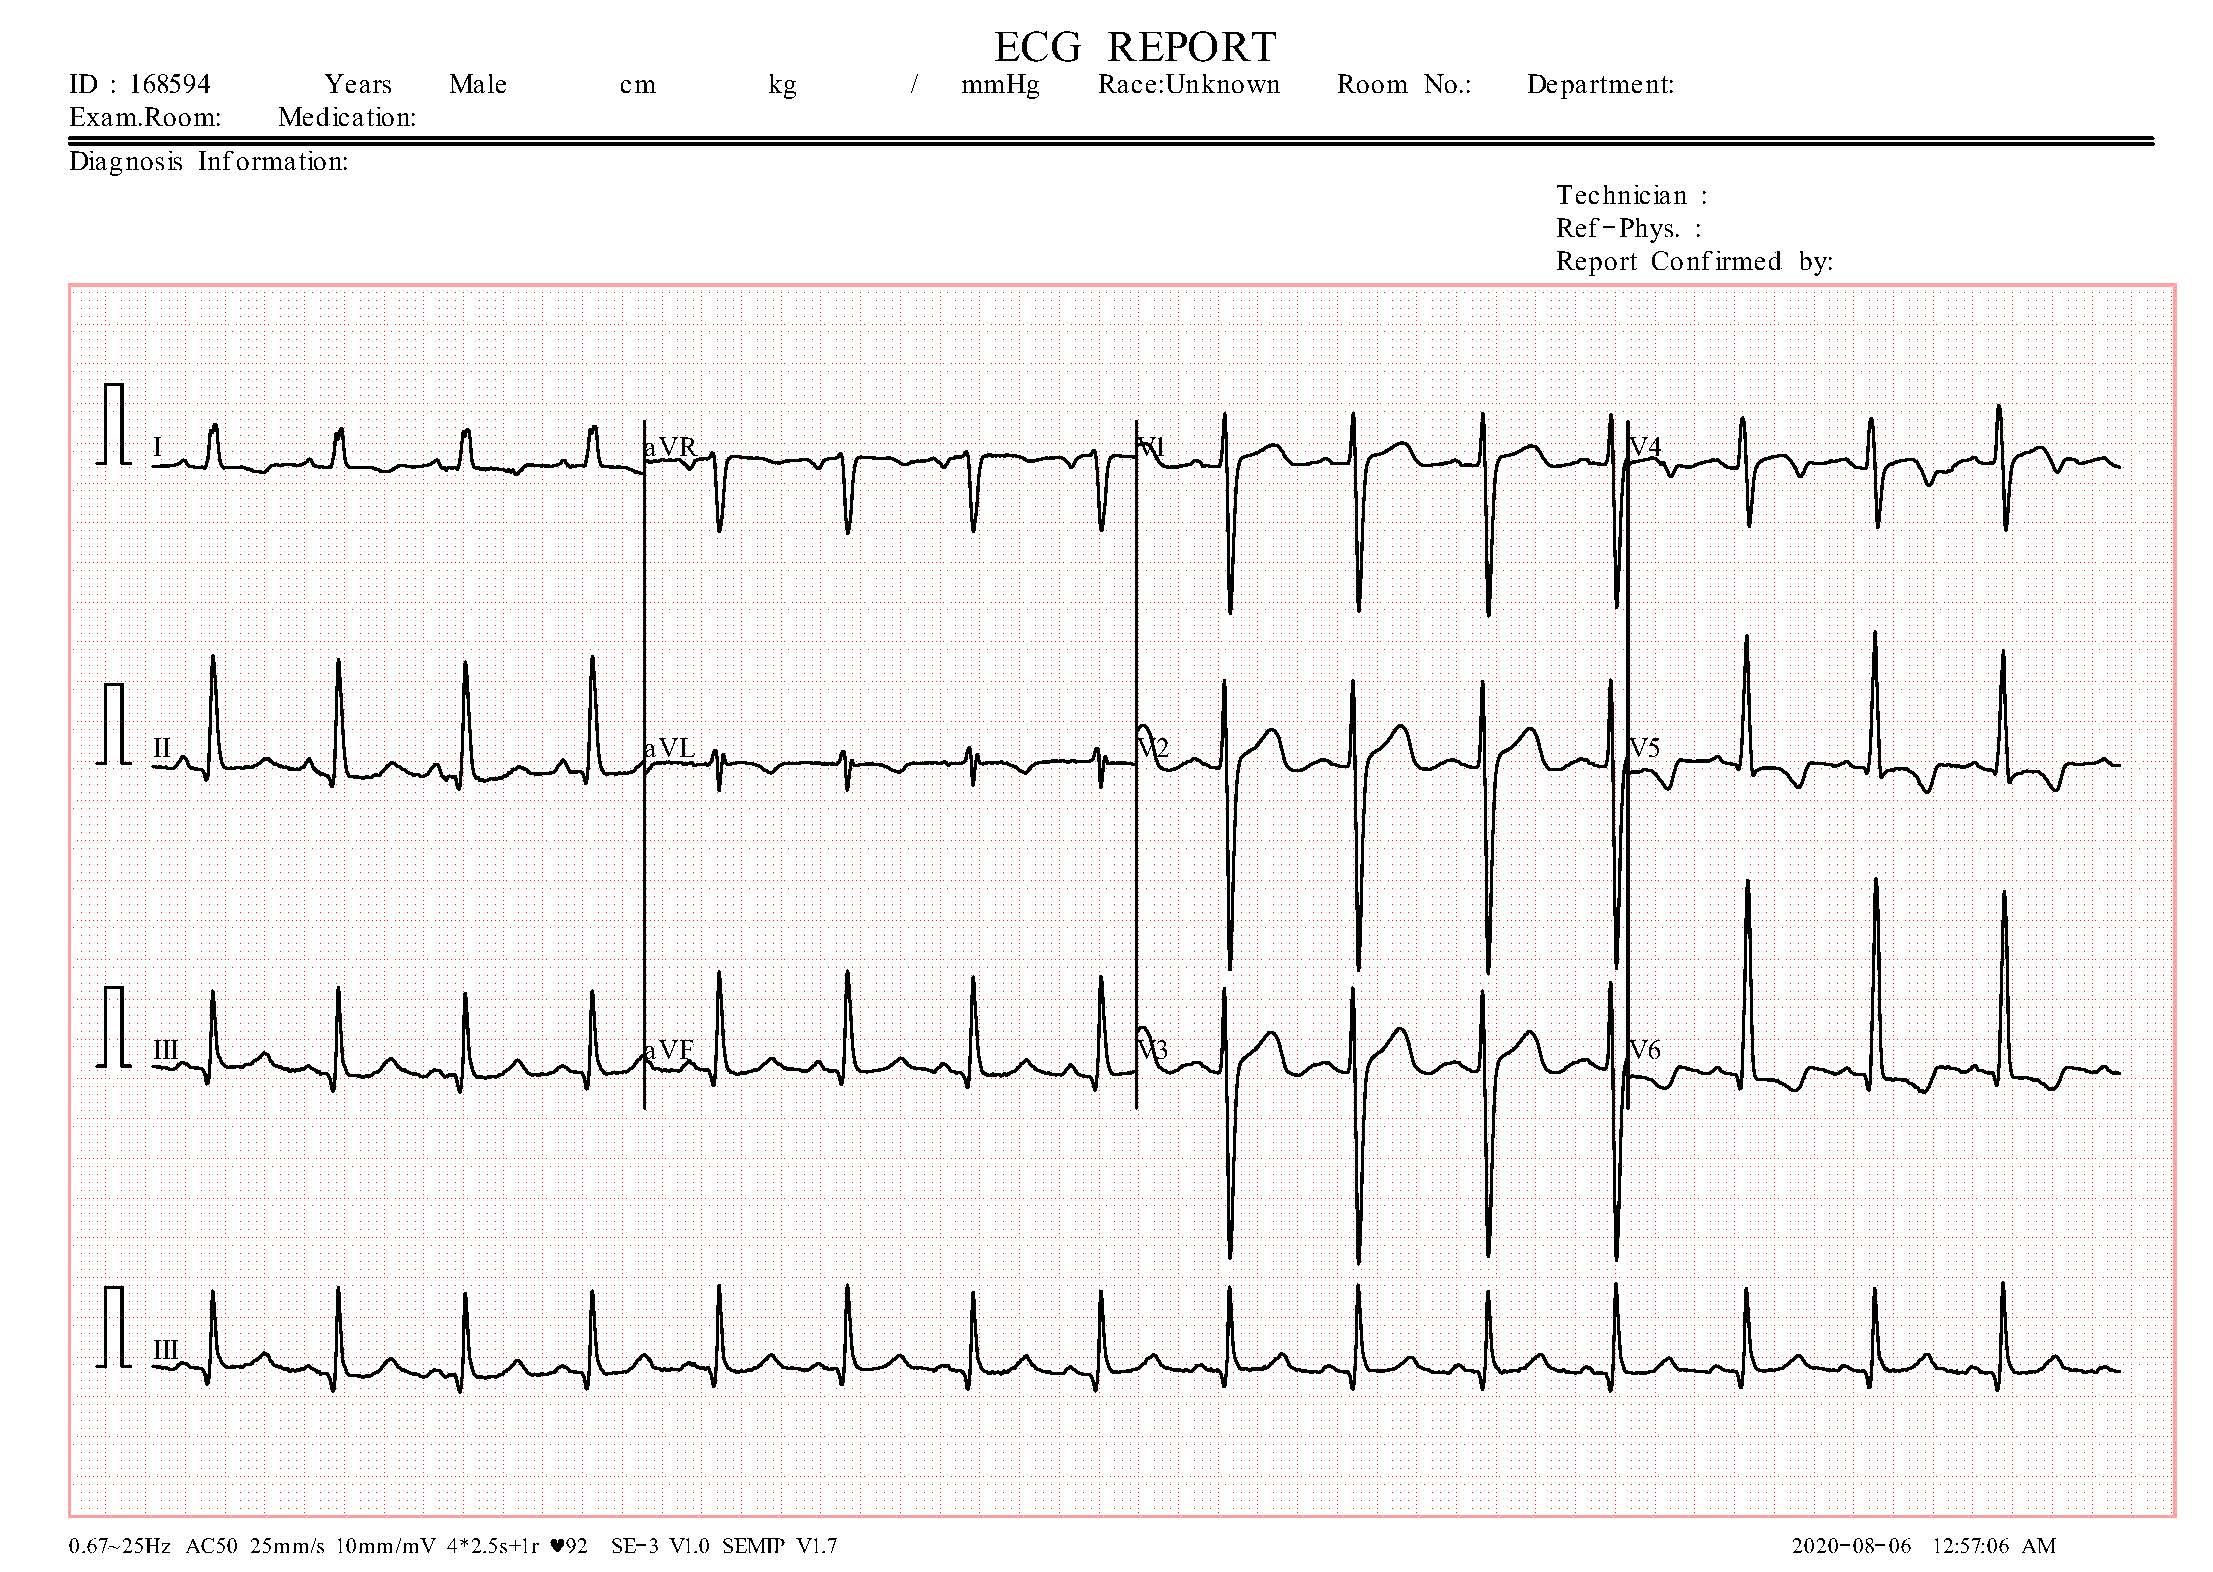

In [79]:
Image(filename='/content/drive/MyDrive/Dataset(Train, Test, Valid)/DS/Apply/abnormal(1).jpg', width=500, height=500) 

In [80]:
cm_plot_labels = ['Abnormal', 'History', 'Mi', 'Normal']
import numpy as np 
preprocessed_image = prepare_image('abnormal(1).jpg')
model = tf.keras.models.load_model("ECGConvNet.model")
predictions = model.predict(preprocessed_image)
arr = np.array(predictions)
print(arr)
max_index_row = np.argmax(arr, axis=1)
#print(max_index_row[0])
print("Probability")
print(arr[0, max_index_row]*100)
cm_plot_labels[max_index_row[0]]

[[9.9999964e-01 5.9802879e-08 2.0604986e-07 5.1263531e-09]]
Probability
[99.99996]


'Abnormal'

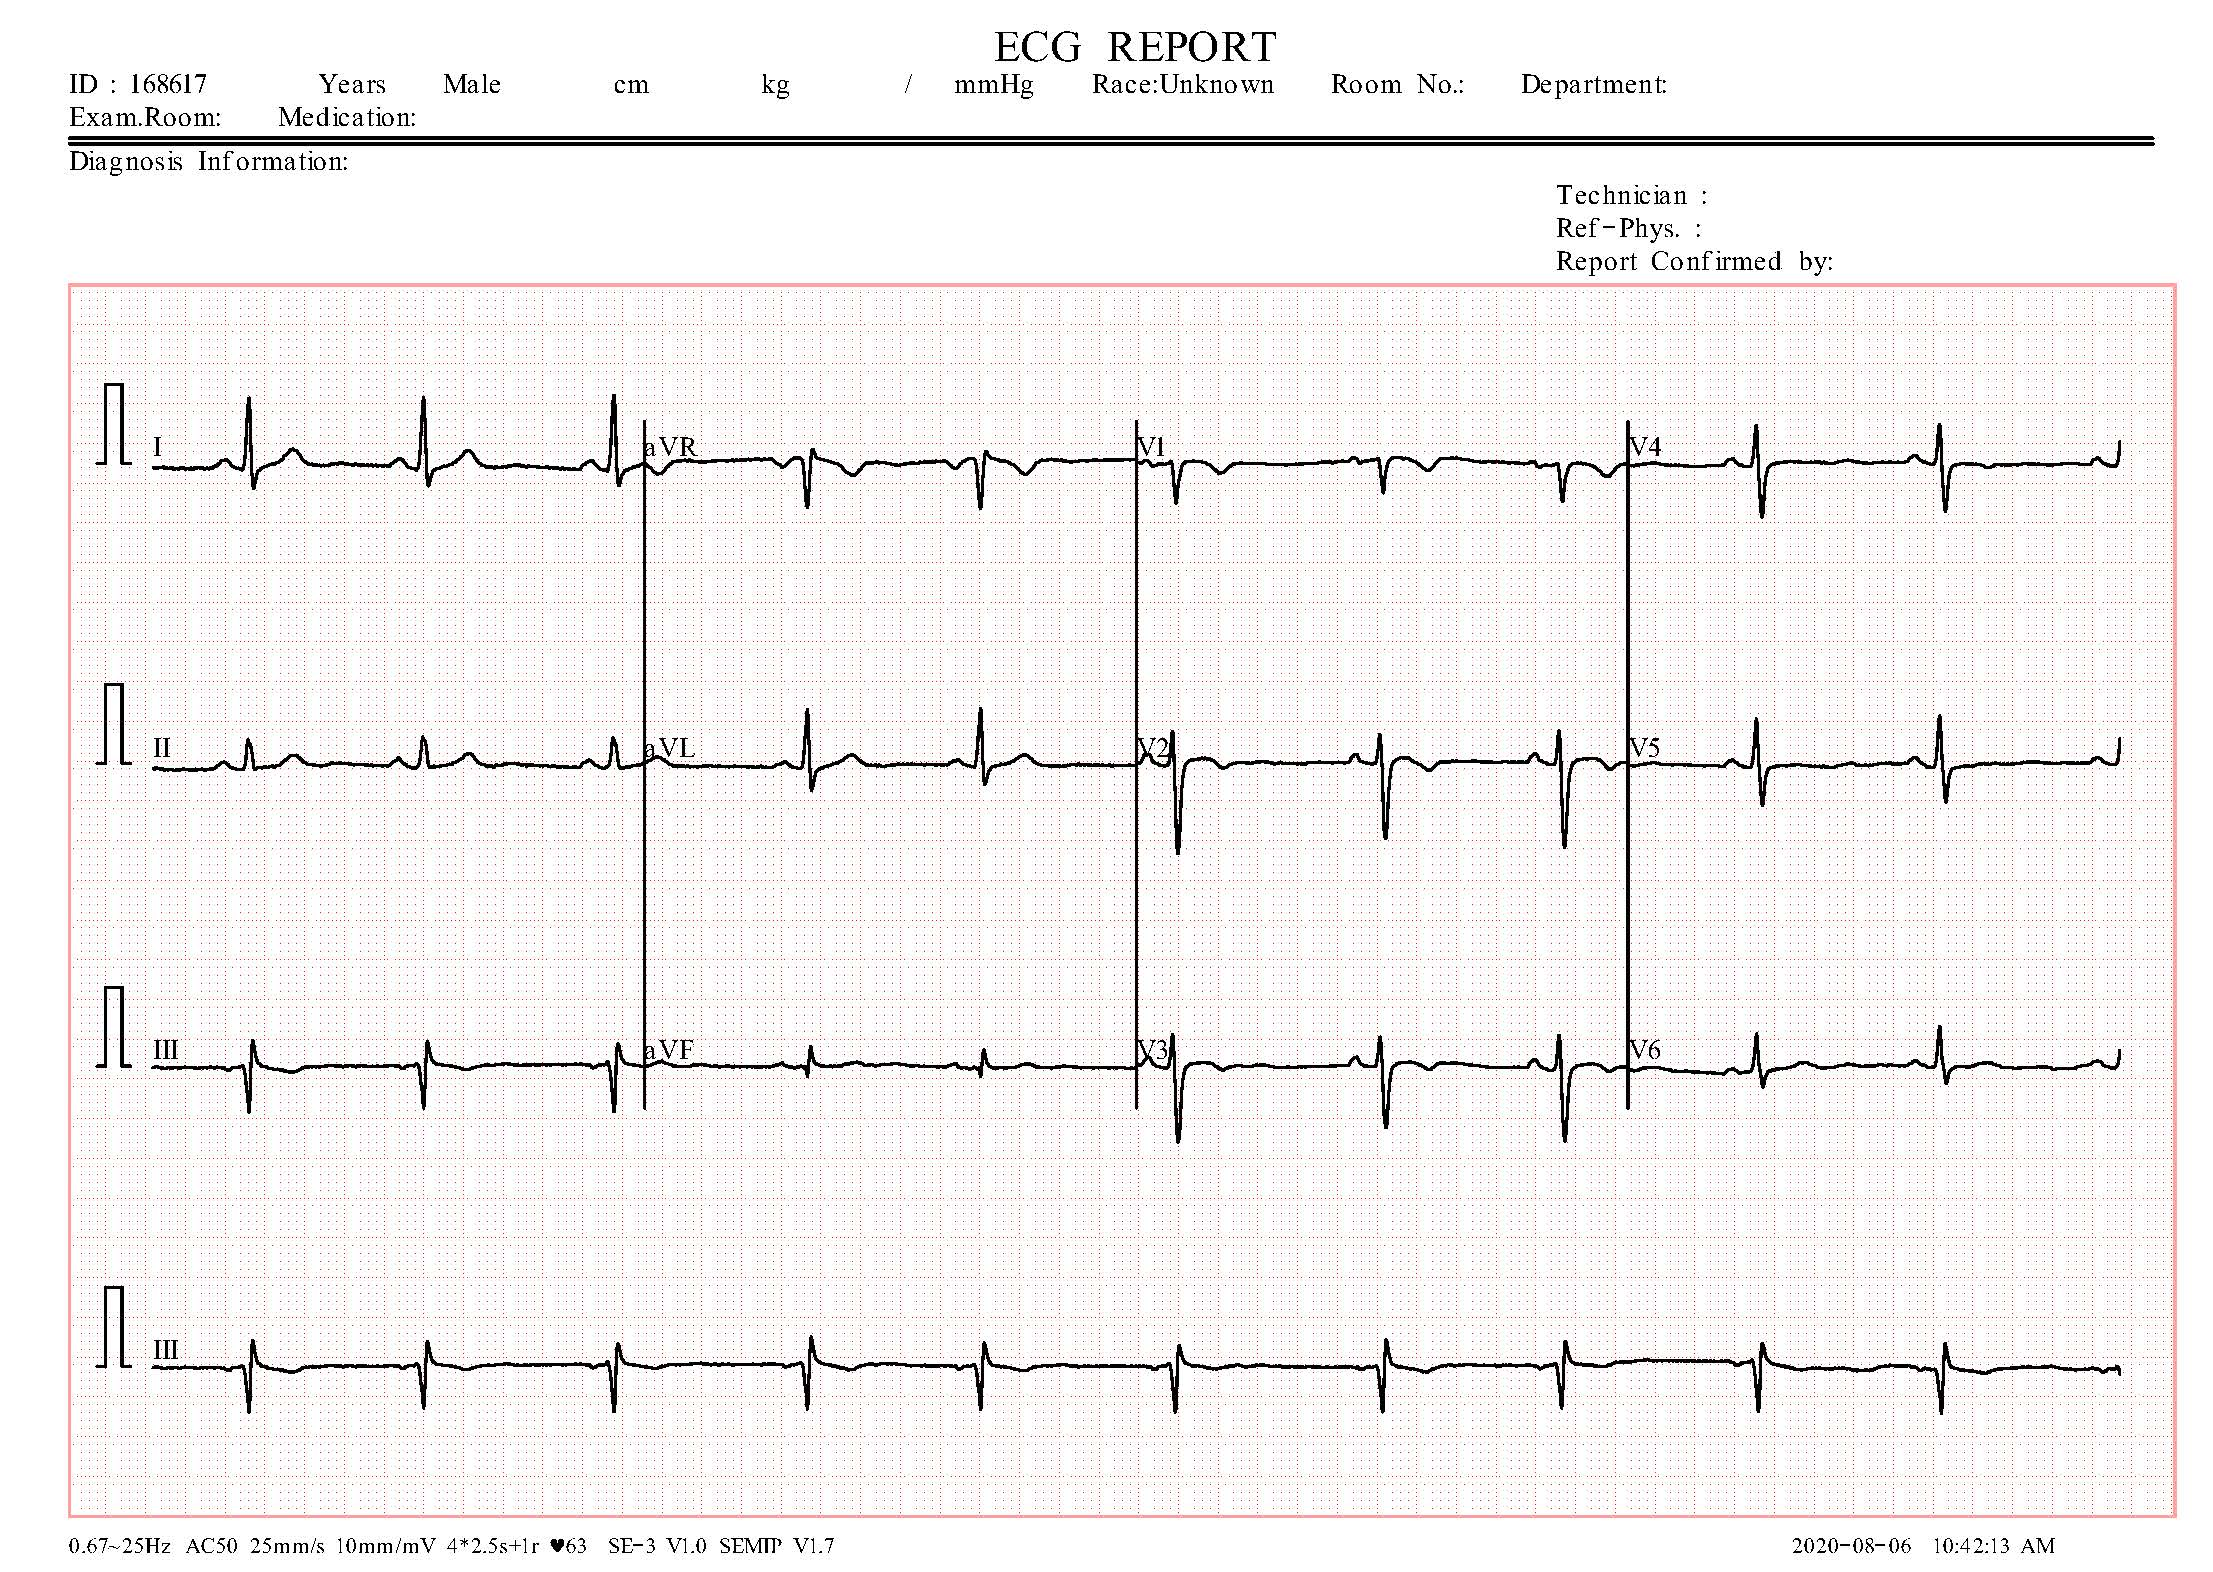

In [81]:
Image(filename='/content/drive/MyDrive/Dataset(Train, Test, Valid)/DS/Apply/history(1).jpg', width=500, height=500) 

In [82]:
cm_plot_labels = ['Abnormal', 'History', 'Mi', 'Normal']
import numpy as np 
preprocessed_image = prepare_image('history(1).jpg')
model = tf.keras.models.load_model("ECGConvNet.model")
predictions = model.predict(preprocessed_image)
arr = np.array(predictions)
print(arr)
max_index_row = np.argmax(arr, axis=1)
#print(max_index_row[0])
print("Probability")
print(arr[0, max_index_row]*100)
cm_plot_labels[max_index_row[0]]

[[2.4593785e-10 1.0000000e+00 6.8600632e-22 2.2758782e-09]]
Probability
[100.]


'History'

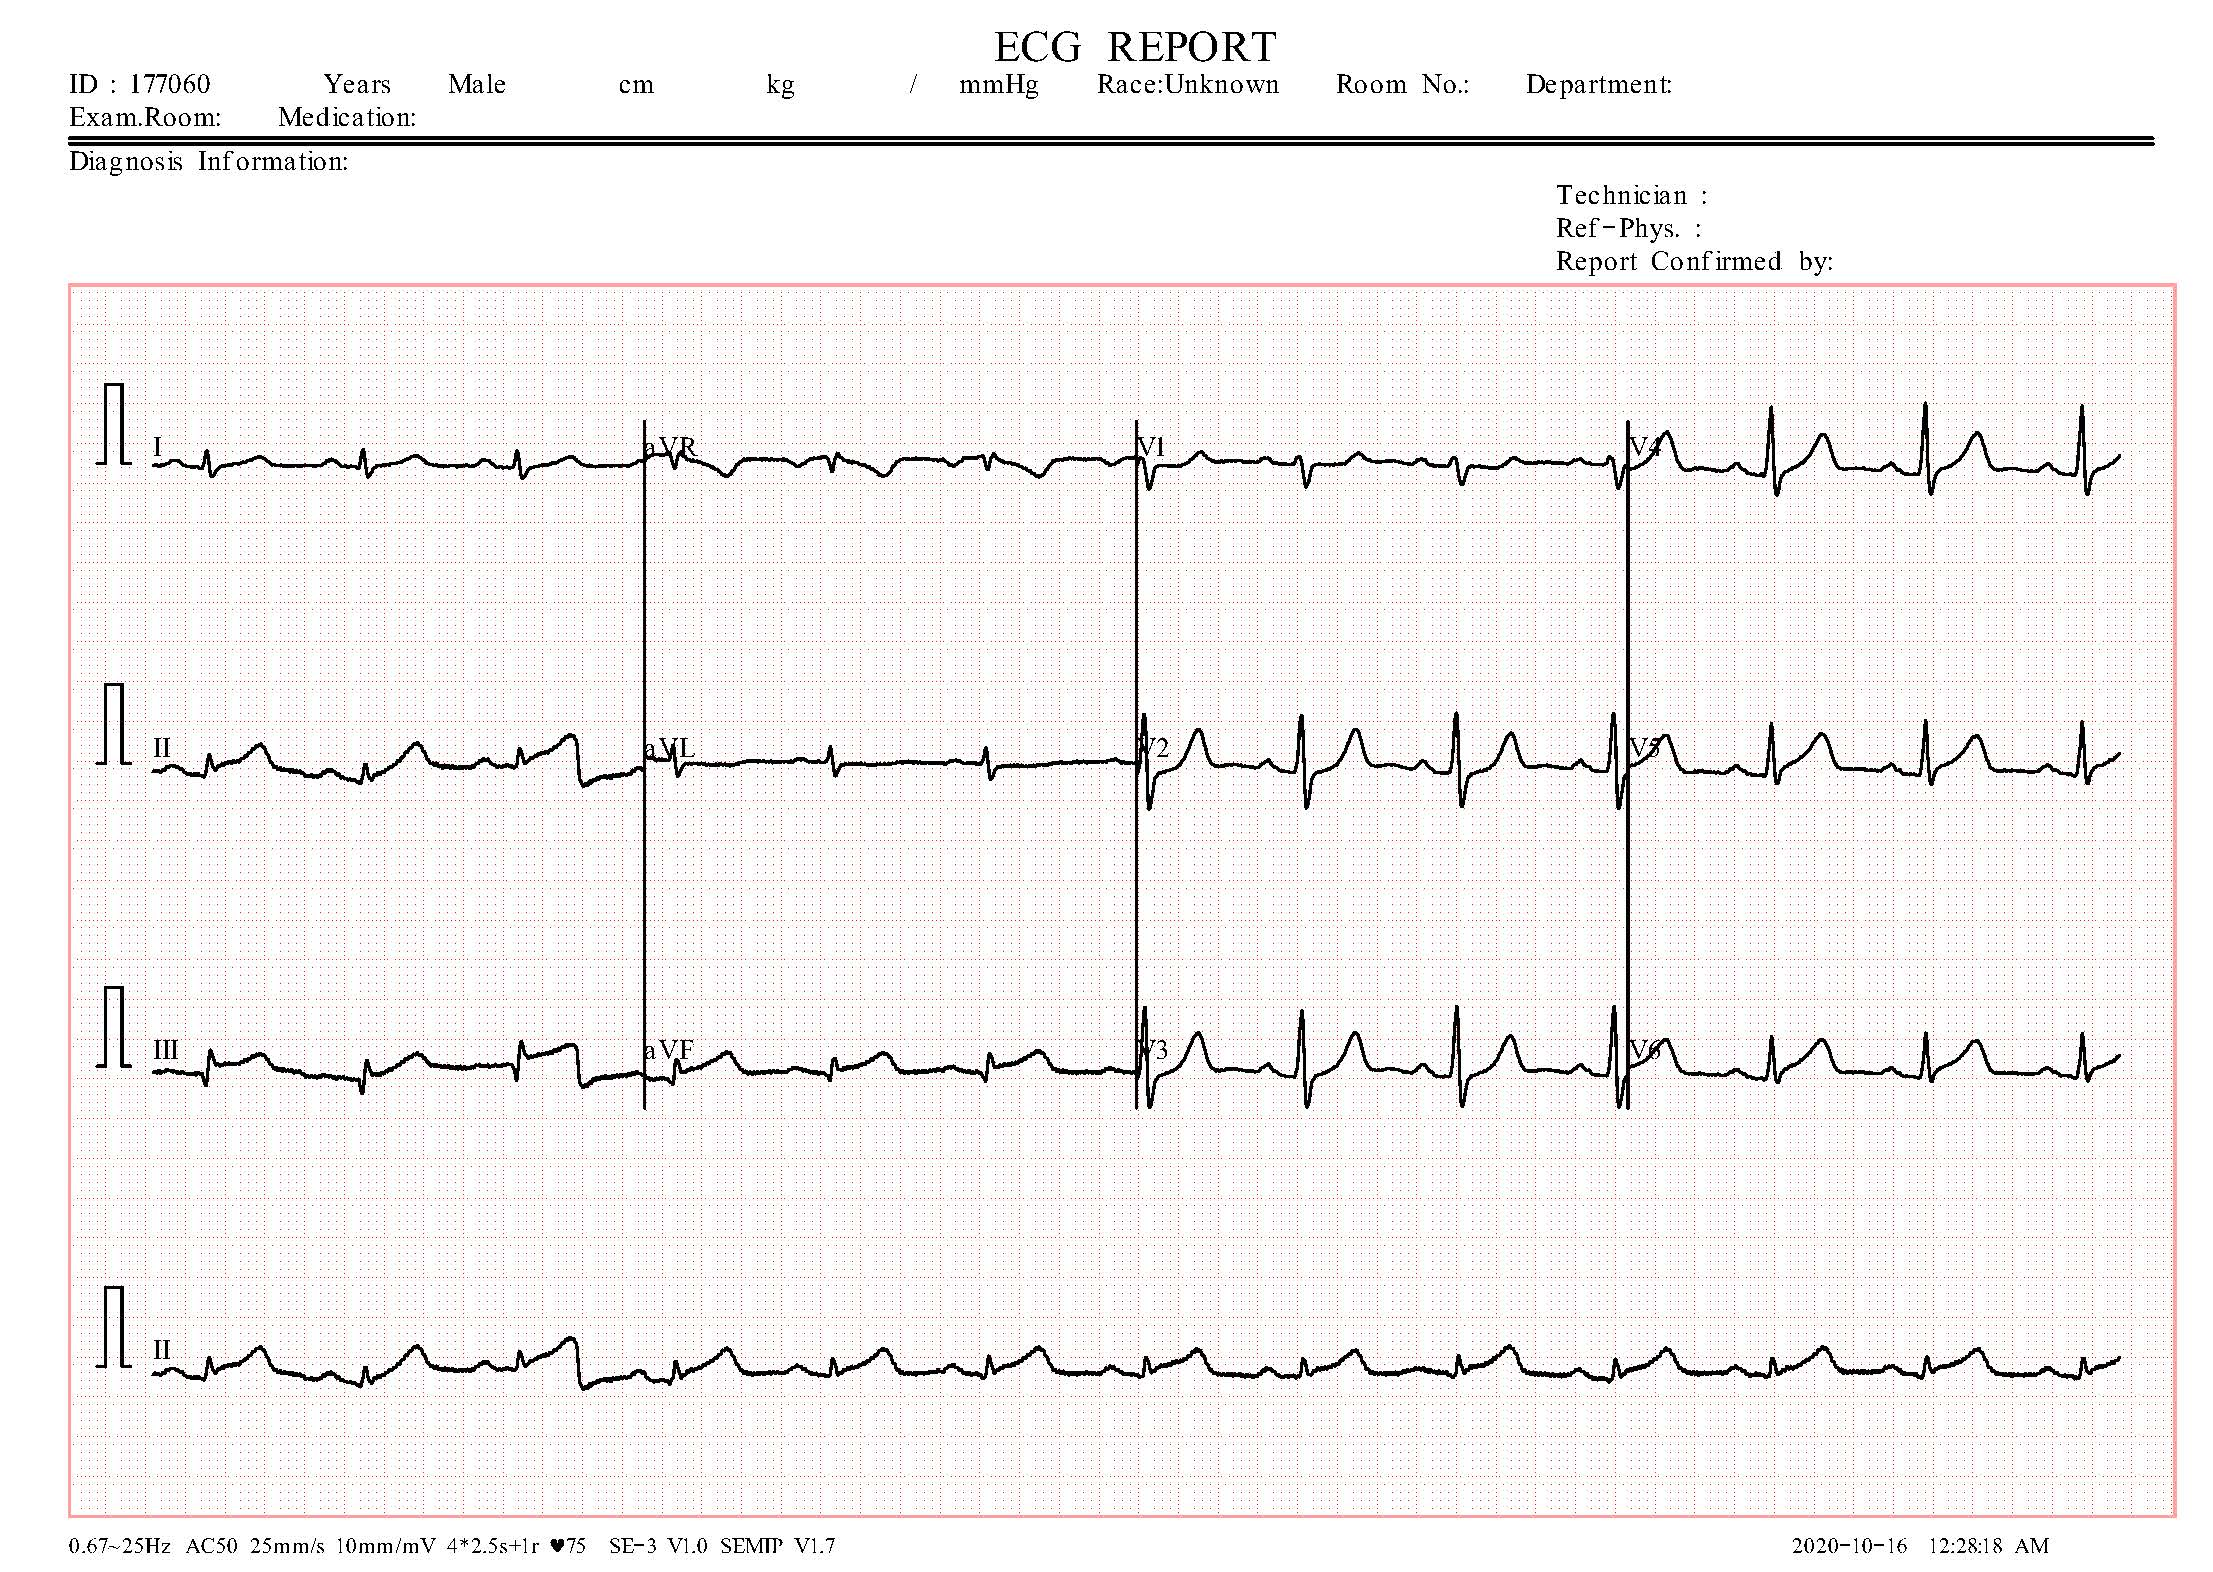

In [83]:
Image(filename='/content/drive/MyDrive/Dataset(Train, Test, Valid)/DS/Apply/mi(1).jpg', width=500, height=500) 

In [84]:
cm_plot_labels = ['Abnormal', 'History', 'Mi', 'Normal']
import numpy as np 
preprocessed_image = prepare_image('mi(1).jpg')
model = tf.keras.models.load_model("ECGConvNet.model")
predictions = model.predict(preprocessed_image)
arr = np.array(predictions)
print(arr)
max_index_row = np.argmax(arr, axis=1)
#print(max_index_row[0])
print("Probability")
print(arr[0, max_index_row]*100)
cm_plot_labels[max_index_row[0]]

[[4.2703054e-18 5.0351261e-25 1.0000000e+00 2.0146889e-14]]
Probability
[100.]


'Mi'

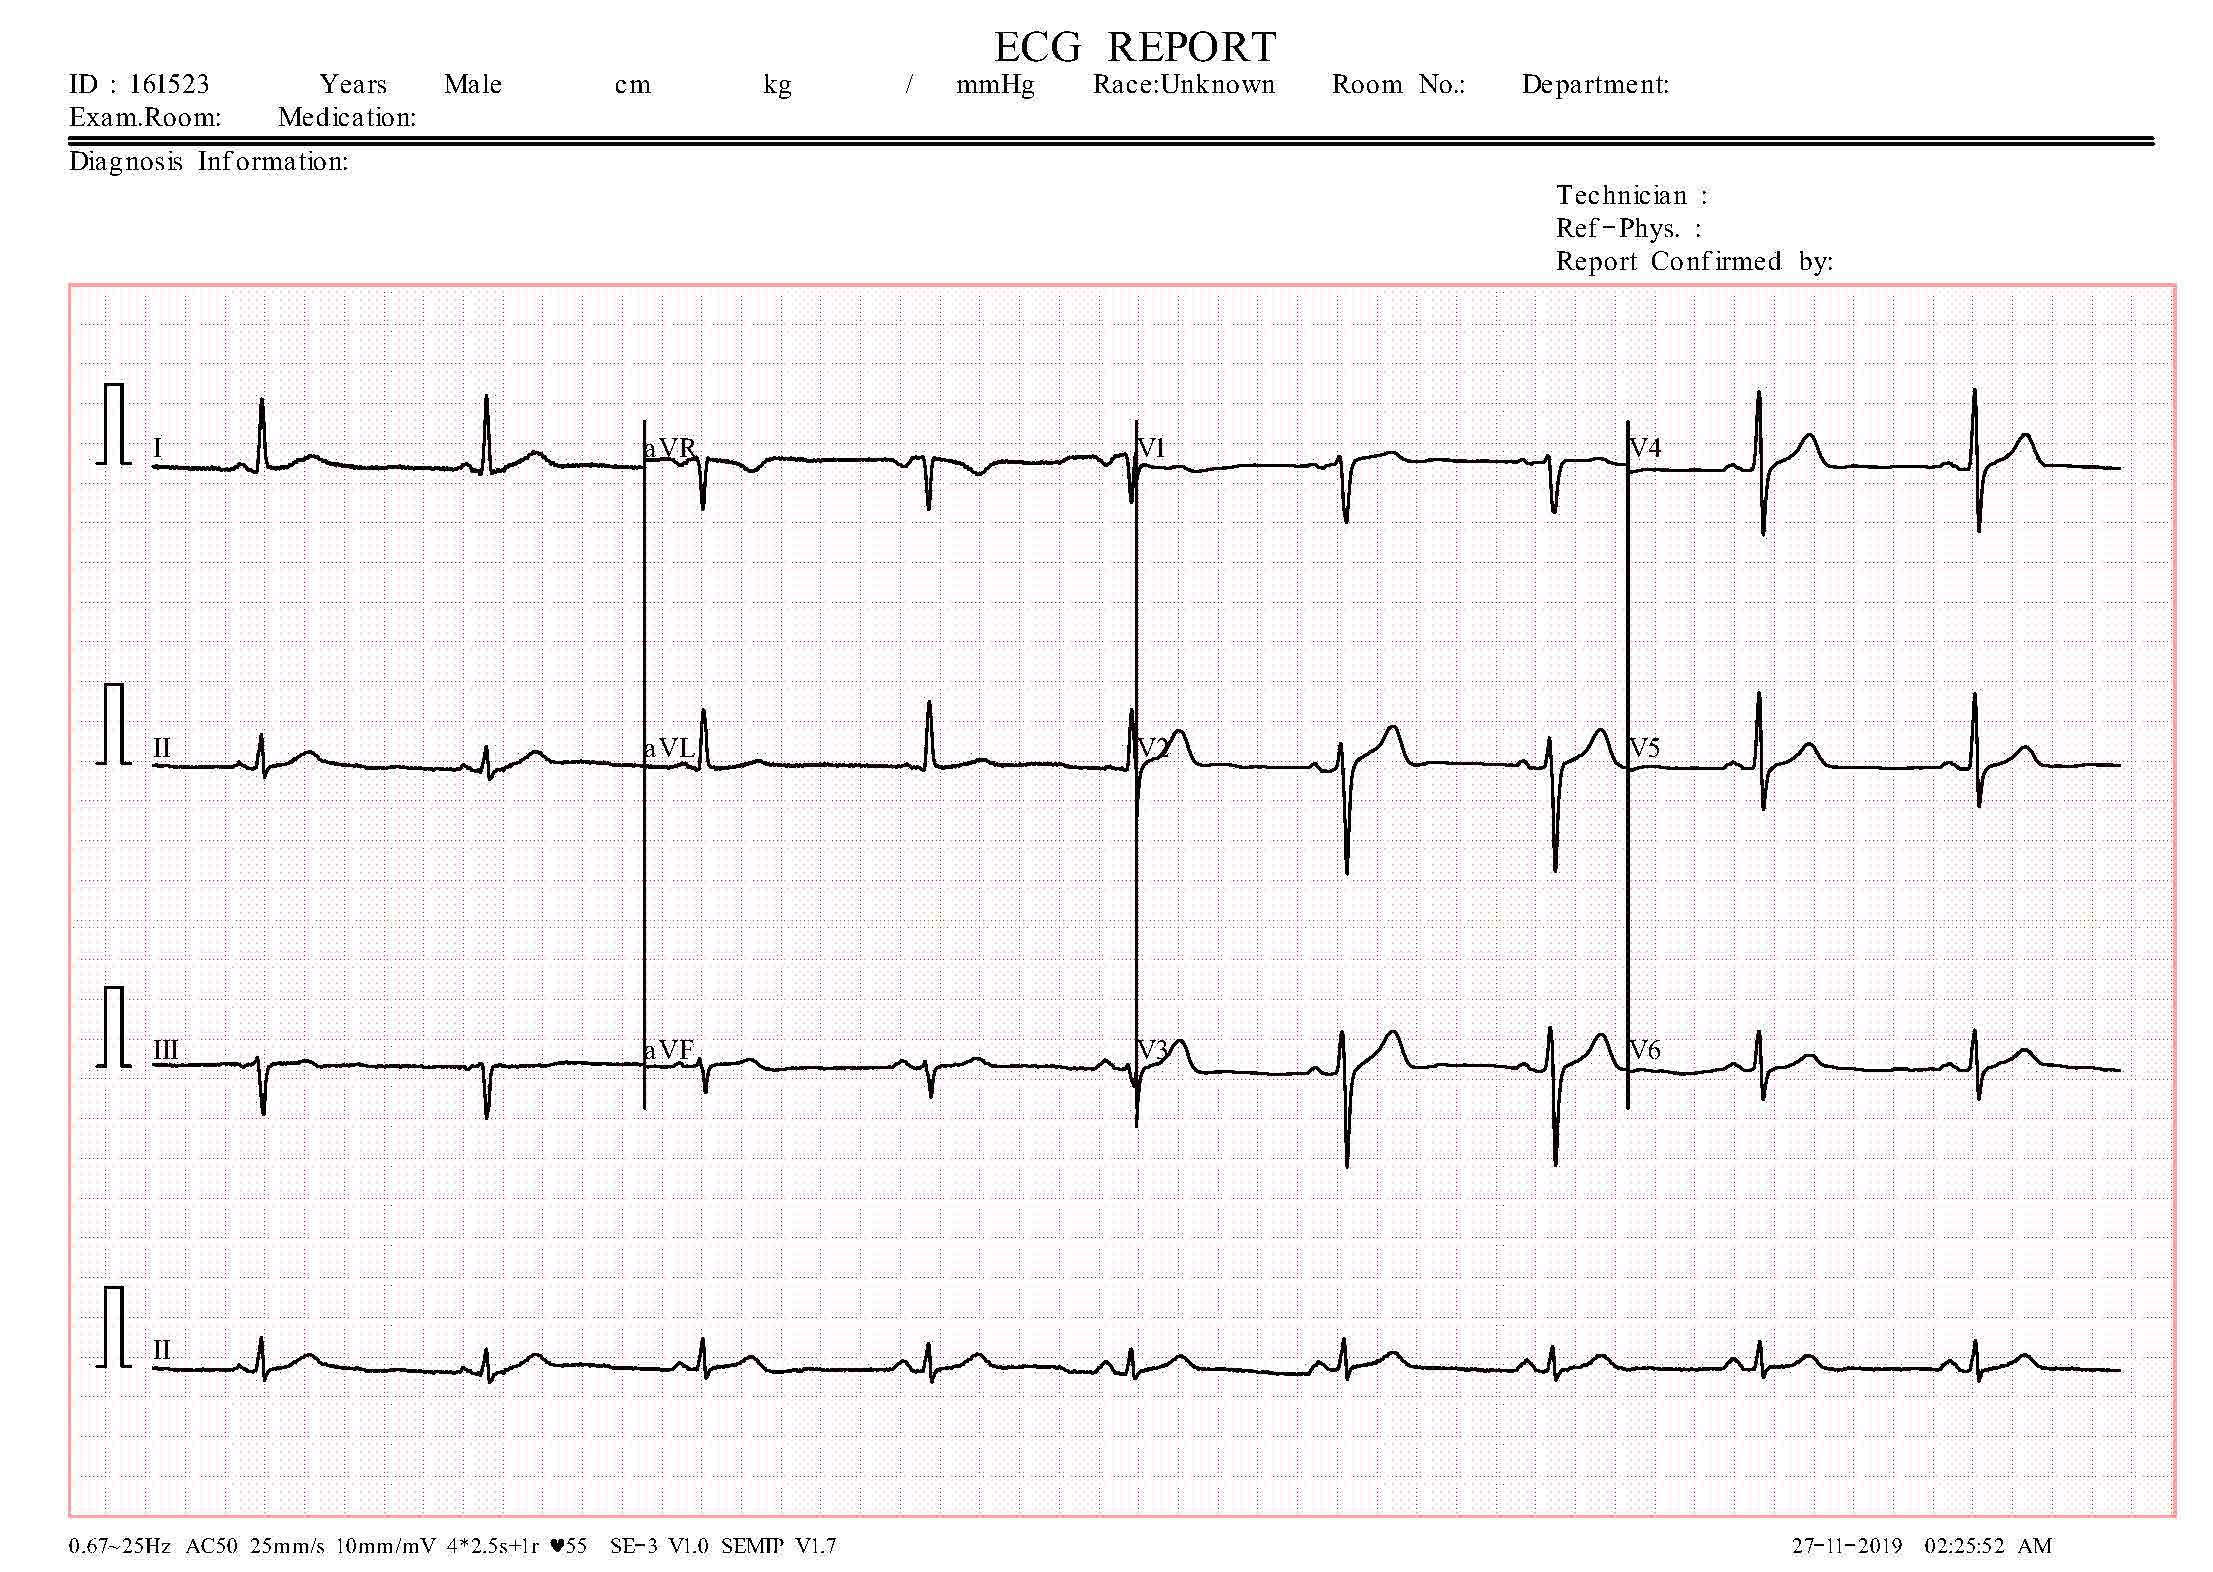

In [85]:
Image(filename='/content/drive/MyDrive/Dataset(Train, Test, Valid)/DS/Apply/normal(3).jpg', width=500, height=500) 

In [86]:
cm_plot_labels = ['Abnormal', 'History', 'Mi', 'Normal']
import numpy as np 
preprocessed_image = prepare_image('normal(3).jpg')
model = tf.keras.models.load_model("ECGConvNet.model")
predictions = model.predict(preprocessed_image)
arr = np.array(predictions)
print(arr)
max_index_row = np.argmax(arr, axis=1)
#print(max_index_row[0])
print("Probability")
print(arr[0, max_index_row]*100)
cm_plot_labels[max_index_row[0]]

[[4.5431739e-07 6.5277213e-08 1.3647897e-15 9.9999952e-01]]
Probability
[99.999954]


'Normal'